In [879]:
#@title 
# HIDDEN
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interactive, widgets
from matplotlib.ticker import FormatStrFormatter
from scipy import stats
from IPython.core.display import HTML, clear_output
import pandas as pd
%matplotlib inline
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
.output{align-items: center;}
</style>
""")

In [739]:
# HIDDEN

print('Aula 6 - 09/10/2020')

Aula 6 - 09/10/2020


In [164]:
# HIDDEN

#@title 
def run_test(epsilon_i, E, sigma_f):
    if epsilon_i * E < sigma_f:
        epsilons = np.linspace(0, epsilon_i, 1000)
        sigmas = E*epsilons
    else:
        epsilons = np.linspace(0, epsilon_i, 1000)
        sigmas = E*epsilons
        sigmas[sigmas>sigma_f] = np.zeros(sigmas[sigmas>sigma_f].shape[0])
    return epsilons, sigmas

def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)

# Estatística de Weibull - Uma Ferramenta de Conversão e Comparação de Comportamentos Mecânicos

## Tópicos:
### Introdução
### Distribuições Estatísticas (Normal e de Weibull)
### A Análise De Weibull
### Considerações Finais

<span class="img_container center" style="display: inline_block; vertical-align: top; text-align: center;" > <img alt="test" src="https://sites.google.com/site/manutencaoclassemundial/_/rsrc/1348618881034/disciplinas/08---26-10---sexta/rcm-reability-centered-maintenance/waloddi-weibull--historia/Wallodi%20Weibull%201887-1979.gif" style="display:block; margin-left: auto; margin-right: auto; text-align: left;" title="Wallodi Weibull" align="center" height="800" width='350' />

# Referências:

### Wachtman, Mechanical Properties of Ceramics Páginas 119-136

### Kendall et al, Influence of toughness on Weibull modulus of ceramic bending strength

### Zwaag et al, The concept of filament strength and the Weibull modulus

# Introdução

Alguns exemplos de aplicação da estatística de Weibull:

- Usada para a definição de apólice de seguros e planos de saúde

- Na previsão climática (na distrbiuição de velocidade dos ventos)

- Na Teoria de Valores Extremos (os "Cisnes Negros")

- Estimativa do tempo de vida de componentes de elevada importância (Oleodutos, dutos e brocas para extração de petróleo e gás e até mesmo componentes da Estação Espacial Internacional)

- Em situações onde elevada reprodutibilidade do comportamento é fundamental (próteses, componentes aeronáuticos, transportes de alta velocidade)

# Introdução

O comportamento mecânico dos materiais é **fundamental** para sua aplicação **segura**, seja em *componentes de máquinas*, ou quando usado como *material estrutural*.

Sendo assim, caracterizá-lo é de grande importância:

<span class="img_container center" style="display: inline_block; vertical-align: top; text-align: center;" > <img alt="test" src="https://www.e-education.psu.edu/matse81/sites/www.e-education.psu.edu.matse81/files/Two_brittle_stress_strain.png" style="display:block; margin-left: auto; margin-right: auto; text-align: left;" title="caption" align="center" /> <div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Figura 1:</b> Ensaio de Flexão de Alumina e um vidro sodalime.</div> </span>

Em um ensaio, aplica-se a carga (ou deslocamento) no material, até atingir sua falha. Esta é caracterizada (para materiais frágeis fraturando de forma catastrófica) como a queda repentina da tensão.

In [734]:
#@title 
# HIDDEN

m=3
E=400e9
sigma_0=220e6
sigma_f_1 = 220e6  # np.random.weibull(m, 1)*sigma_0
mpl.rcParams.update({'font.size': 22})

def f(epsilon_i):
    epsilons_1, sigmas_1 = run_test(epsilon_i, E, sigma_f_1)
    epsilon_max = sigma_f_1/E
    bar = np.array([0.09, 0.1, 0.11])
    plt.figure(figsize=(10, 10))
#     plt.text(0.0925, 215, 'Amostra')
#     plt.text(bar[0]*(1-epsilon_i*100)*0.9, 205, 'F')
#     plt.text(bar[2]*(1+epsilon_i*100)*1.06, 205, 'F')

#     plt.arrow(bar[0]*(1-epsilon_i*100), 200, -0.01, 0, head_width=10, head_length=0.005,
#               fc='k', ec='k', zorder=4)
#     plt.arrow(bar[2]*(1+epsilon_i*100), 200, 0.01, 0, head_width=10, head_length=0.005,
#               fc='k', ec='k', zorder=4)
#     if epsilon_i < epsilon_max:
#         plt.plot([bar[0]*(1-epsilon_i*100), bar[1],
#                   bar[2]*(1+epsilon_i*100)], [200, 200, 200], lw=10, c='k', label='Amostra')
#     if epsilon_i >= epsilon_max:
#         plt.plot([bar[0]*(1-epsilon_i*100),
#                   bar[1]*(1-(epsilon_i-epsilon_max)*100)-0.0021], [200, 200], lw=10, c='k')
#         plt.plot([bar[1]*(1+(epsilon_i-epsilon_max)*100)+0.0021,
#                   bar[2]*(1+epsilon_i*100)], [200, 200], lw=10, c='k', label='Amostra')
    plt.plot(epsilons_1*100, sigmas_1*1e-6, c='Navy', lw=5)
    plt.ylim(0, 300)
    plt.xlim(0, 0.14e-2*100)
    plt.ylabel('Tensão, $\sigma$ [MPa]')
    plt.xlabel('Deformação, $\epsilon$ [%]')
    plt.grid(lw=0.25)
#     plt.legend(borderpad=1.2)
    plt.show()

int_plot = interactive(f,
#                        epsilon_i=(0, 1e-4, 0.1e-5),
                         epsilon_i=widgets.FloatSlider(value=0,
                                                       min=0,
                                                       max=1e-3,
                                                       step=2e-5,
                                                       description='$\epsilon$',
                                                       readout_format='.2e',
                                                       orientation='horizontal')
                      )
output = int_plot.children[-1]
output.layout.height = '630px'
int_plot.layout = widgets.Layout(display='flex',
                               flex_flow='column-reverse',
                               align_items='center',
                               align_content='center',
                               justify_content='center',
                               width='100%')
int_plot

interactive(children=(FloatSlider(value=0.0, description='$\\epsilon$', max=0.001, readout_format='.2e', step=…

<div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Widget 1:</b> Ensaio de Flexão 3-Pontos de uma Alumina.</div> </span>

# Mas onde o material falhou?

Uma maneira de responder essa pergunta é através da análise das tensões em um corpo sujeito a flexão em 3 pontos.

Isto pode ser feito de maneira analítica (como na disciplina Mecânica dos Sólidos) ou de maneira numérica como através da simulação por elementos finitos abaixo:

<span class="img_container center" style="display: inline_block; vertical-align: top; text-align: center;" > <img alt="test" src="./resources/3pt_bending.png" style="display:block; margin-left: auto; margin-right: auto; text-align: left;" title="caption" align="center" /> <div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=700px"><b>Figura 2:</b> Simulação de Elementos Finitos de um Ensaio Flexão. Mapa de calor da tensão no material.</div> </span>

Este resultado pode ser avaliado também pela deformação no corpo de prova, como também é possível observar na malha deformada abaixo:

<span class="img_container center" style="display: inline_block; vertical-align: top; text-align: center;" > <img alt="test" src="./resources/3pt_bending_deformation.png" style="display:block; margin-left: auto; margin-right: auto; text-align: left;" title="caption" align="center" /> <div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Figura 3:</b> Simulação de Elementos Finitos de um Ensaio Flexão. Mapa de calor da tensão no material, considerando deformação (exagerada).</div> </span>

Isso vale para um material **perfeito** (sem defeitos), porém, devemos lembrar que os defeitos são **intrínsecos** ao material! Sendo assim, a pergunta contínua:

***Onde o material falhou?***

Lembrando que defeitos concentram tensões, não é só o local da falha, mas também a resistência mecânica que dependerá das suas posições e características. Como exemplo, consideremos 3 possíveis defeitos:
<span class="img_container center" style="display: inline_block; vertical-align: top; text-align: center;" > <img alt="test" src="./resources/3pt_bending_defects.png" style="display:block; margin-left: auto; margin-right: auto; text-align: left;" title="caption" align="center" />

O material pode romper em alguns possíveis cenários como:
- Romper na superfície inferior, onde a tração é máxima, assim que alcançar o limite
- Romper no defeito 1, caso a combinação de tensão trativa local, geometria e tamanho do defeito resultarem no $\sigma_{th}$
- Romper no defeito 2
- Romper no defeito 3

# Em síntese:

O valor de resistência mecânica vai depender dos seguintes fatores:
1. Tamanho (e geometria) do defeito
2. Posição do defeito no corpo
3. Orientação do defeito relativa ao corpo

Todas estas características serão **dependentes** de fatores *determinísticos* (parâmetros de processamento, matérias-primas, aditivos, ...),  e *estocásticos* e assim, dentro de uma amostra de $n$ corpos de um mesmo material teremos uma **distribuição** de valores de resistência mecânica.

Assim, temos três consequências principais:

* O uso do $\sigma_f$ médio **não é apropriado** para **projetos** de estruturas ou componentes

* A **probabilidade** de falha de uma peça **maior é maior** do que o de uma peça menor

* O valor de resistência mecânica obtido **depende da técnica utilizada** (já que diferentes técnicas **solicitam diferentes volumes** do material em **tração**)

Dessa forma, apresentaremos **ferramentas estatísticas** para tratar estes dados e poder **quantificar** o comportamento geral de um dado material.

Começaremos com uma breve **revisão estatística** e em seguida introduziremos **análises** passíveis de serem feitas usando estas ferramentas e os **conceitos já vistos no curso**.

# Distribuições Estatísticas

Começemos considerando uma distribuição de uma variável contínua, no caso uma amostra de 10000 pessoas nas quais se perguntou a sua altura. Nós podemos visualizar o resultado através de um histograma:

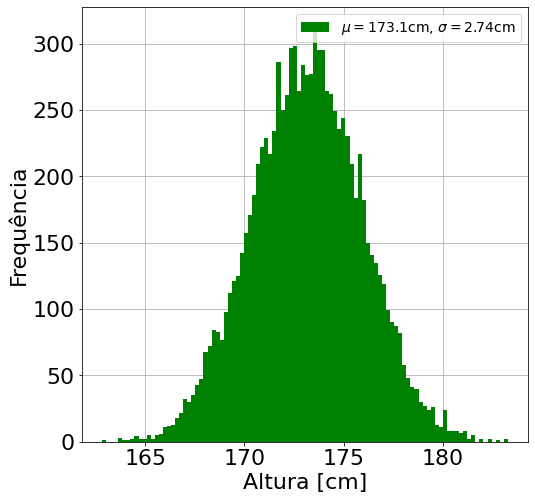

In [744]:
# HIDDEN

fig = plt.figure(figsize=(8, 8))
mpl.rcParams.update({'font.size': 22})
mu_3 = 173.1
sigma_3 = 2.74
plt.hist(stats.norm.rvs(loc=mu_3, scale=sigma_3, size=10000), 100, color='green', zorder=3, label=f'$\mu={mu_3}$cm, $\sigma={sigma_3}$cm')

plt.ylabel('Frequência')
plt.xlabel('Altura [cm]')

plt.legend(fontsize=14)
plt.grid()
plt.show()

<div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Figura 5:</b> Resultados de uma pesquisa feita com 10000 pessoas sobre suas alturas.</div> </span>

Esta distribuição pode ser descrita por dois valores, a média, $\mu$ e o desvio padrão, $\sigma$.
Seus efeitos no perfil do histograma de distribuição pode ser visto abaixo:

In [745]:
#@title 
# HIDDEN

mu_3 = 173.1
sigma_3 = 7.5
dist_3 = stats.norm.rvs(loc=mu_3, scale=sigma_3, size=10000)
def f(sigma_1, mu_1):
    plt.figure(figsize=(10, 10))
    plt.hist(dist_3, color='green', zorder=3, 
             bins=np.arange(110, 250 + 2, 2),
             label=f'$\mu={mu_3}$cm, $\sigma={round(sigma_3**0.5, 2)}$cm')
    plt.hist(stats.norm.rvs(loc=mu_1, scale=sigma_1**2, size=10000),
             color='navy', zorder=3, 
             bins=np.arange(110, 250 + 2, 2),
             label=f'$\mu={mu_1}$cm, $\sigma={round(sigma_1, 2)}$cm', alpha=0.5)

    plt.ylabel('Frequência')
    plt.xlabel('Altura [cm]')
    
    plt.legend(fontsize=14)
    plt.grid()
    plt.show()

int_plot = interactive(f,
#                        epsilon_i=(0, 1e-4, 0.1e-5),
                         mu_1=widgets.FloatSlider(value=173.1,
                                                       min=120,
                                                       max=210,
                                                       step=5,
                                                       description='$\mu$',
                                                       orientation='horizontal'),
                       sigma_1=widgets.FloatSlider(value=2.74,
                                                       min=0.25,
                                                       max=5.5,
                                                       step=0.25,
                                                       description='$\sigma$',
                                                       orientation='horizontal')
                      )
output = int_plot.children[-1]
output.layout.height = '630px'
int_plot.layout = widgets.Layout(display='flex',
                               flex_flow='column-reverse',
                               align_items='center',
                               align_content='center',
                               justify_content='center',
                               width='100%')
int_plot

interactive(children=(FloatSlider(value=2.74, description='$\\sigma$', max=5.5, min=0.25, step=0.25), FloatSli…

<div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Widget 2:</b> Efeitos dos parâmetros de uma distribuição normal.</div> </span>

Nós podemos aproximar os dados coletados por uma curva de distribuição (ou função) de densidade de probabilidade, a FDP, levando a espessura da barra para zero.



Outra forma de visualizar estes resultados é através da função de distribuição acumulada, a FDA, que apresenta qual a fração da amostra que tem um valor igual ou menor do que determinado valor.

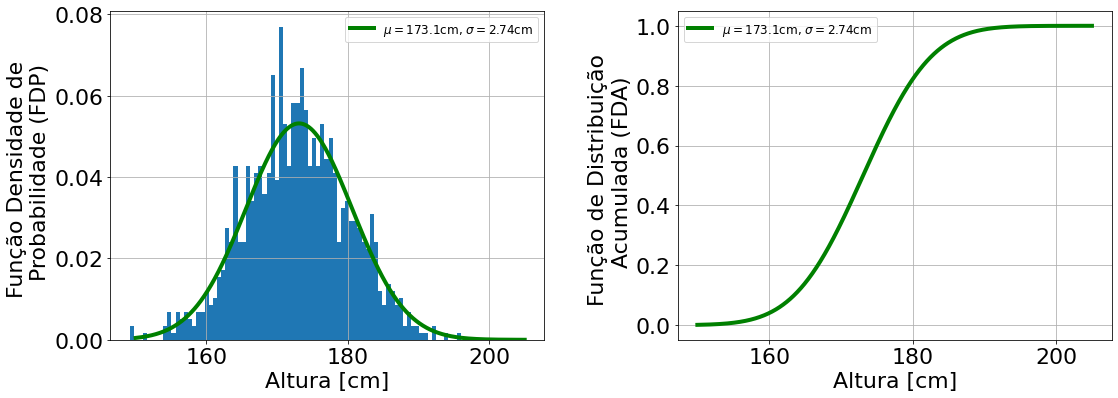

In [764]:
# HIDDEN

xs = np.linspace(150, 205, 1000)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
mu_3 = 173.1
sigma_3 = 7.5
normal_3 = stats.norm(loc=mu_3, scale=sigma_3)
axs[1].plot(xs, normal_3.cdf(xs), c='green', lw=4,
            label=f'$\mu={mu_3}$cm, $\sigma={round(sigma_3**0.5, 2)}$cm')
axs[0].hist(normal_3.rvs(1000), density=True, bins=80, zorder=0)
axs[0].plot(xs, normal_3.pdf(xs), c='green', lw=4,
            label=f'$\mu={mu_3}$cm, $\sigma={round(sigma_3**0.5, 2)}$cm')


axs[1].set_ylabel('Função de Distribuição \n Acumulada (FDA)')
axs[0].set_ylabel('Função Densidade de \n Probabilidade (FDP)')


for ax in axs:
    ax.set_xlabel('Altura [cm]')
    ax.grid()
    ax.legend(fontsize=12)
plt.tight_layout(w_pad=2)
plt.show()

<div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Figura 6:</b> Exemplos de distribuição normal com diferentes parâmetros. de localização (média) e escala (desvio padrão), apresentados pela Função de Distribuição Acumulada e Função Densidade de Probabilidade.</div> </span>

## Efeito dos Parâmetros em uma Distribuição Normal

In [79]:
#@title 
# HIDDEN

mu_3 = 173.1
sigma_3 = 7.5
xs = np.linspace(100, 250, 1000)
cdf_3 = stats.norm.cdf(xs, loc=mu_3, scale=sigma_3)
pdf_3 = stats.norm.pdf(xs, loc=mu_3, scale=sigma_3)
def f(sigma_1, mu_1):
    fig, axs = plt.subplots(1, 2, figsize=(18, 8))
    axs[1].plot(xs, cdf_3, c='Navy', lw=2,
                label=f'$\mu={mu_3}$cm, $\sigma={round(sigma_3**0.5, 2)}$cm')
    axs[0].plot(xs, pdf_3, c='Navy', lw=2,
                label=f'$\mu={mu_3}$cm, $\sigma={round(sigma_3**0.5, 2)}$cm')
    axs[1].plot(xs, stats.norm.cdf(xs, loc=mu_1, scale=sigma_1**2), c='red', lw=2,
                label=f'$\mu={mu_1}$cm, $\sigma={round(sigma_1, 2)}$cm')
    axs[0].plot(xs, stats.norm.pdf(xs, loc=mu_1, scale=sigma_1**2), c='red', lw=2,
                label=f'$\mu={mu_1}$cm, $\sigma={round(sigma_1, 2)}$cm')
    axs[1].set_ylabel('Função de Distribuição \n Acumulada (FDA)')
    axs[0].set_ylabel('Função Densidade de \n Probabilidade (FDP)')
    for ax in axs:
        ax.set_xlabel('Altura [cm]')
        ax.legend(loc='upper left', fontsize=14)
        ax.grid()
    plt.tight_layout()
    plt.show()

int_plot = interactive(f,
#                        epsilon_i=(0, 1e-4, 0.1e-5),
                          sigma_1=widgets.FloatSlider(value=2.74,
                                                       min=0.25,
                                                       max=5.5,
                                                       step=0.25,
                                                       description='$\sigma$',
                                                       orientation='horizontal', layout={'fontsize': 20}),
                          
                       mu_1=widgets.FloatSlider(value=173.1,
                                                       min=120,
                                                       max=210,
                                                       step=5,
                                                       description='$\mu$',
                                                       orientation='horizontal')
                      )
output = int_plot.children[-1]
output.layout.height = '600px'
int_plot.layout = widgets.Layout(display='flex',
                               flex_flow='column-reverse',
                               align_items='center',
                               align_content='center',
                               justify_content='center',
                               width='100%')
int_plot

interactive(children=(FloatSlider(value=2.74, description='$\\sigma$', max=5.5, min=0.25, step=0.25), FloatSli…

<div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Widget 3:</b> Efeitos dos parâmetros de uma distribuição normal na sua FDP e FDA.</div> </span>

Estas funções podem ser interpoladas dos dados experimentais

Devido o fato de que **um grande número de fenômenos** serem representados por um **pequeno número de funções analíticas**, estas ditribuições possuem nomes próprios:

- Distribuição **normal** (Gaussiana)

- Distribuição de Pareto

- Distribuição Logística

- Distribuição de Cauchy

- Distribuição de Boltzmann

- ***Distribuição de Weilbull***

## A Distribuição de Weibull

A função de distribuição de Weibull é definida pela seguinte função de distribuição acumulada:

\begin{equation}
P_{f}(\sigma)=\left\{\begin{array}{ll}
1-e ^{-\left(\frac{\sigma-\sigma_{u}}{\sigma_{0}}\right)^{m}} & \sigma>\sigma_{u} \\
0 & \sigma \leq \sigma_{u}
\end{array}\right.
\end{equation}

E sua função densidade de probabilidade é dada por
\begin{equation}
p(\sigma)=\left\{\begin{array}{ll}
- \frac{m}{\sigma_{0}} \left(\frac{\sigma-\sigma_{u}}{\sigma_{0}}\right)^{m-1} e ^{-\left(\frac{\sigma-\sigma_{u}}{\sigma_{0}}\right)^{m}} & \sigma>\sigma_{u} \\
0 & \sigma \leq \sigma_{u}
\end{array}\right.
\end{equation}

---



Os gráficos a seguir demonstram a sua FDP e FDA:

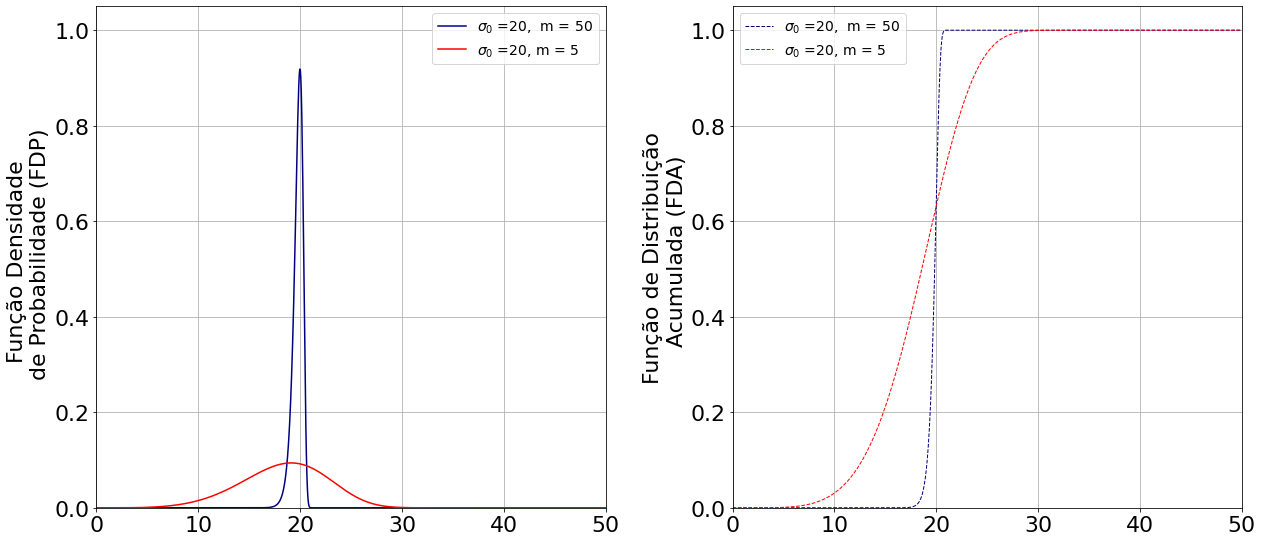

In [124]:
#@title
# HIDDEN

sigma = np.linspace(0,50, 1000)
m = 15
sigma_0 = 20
weibull_pdf = lambda sigma, m, sigma_0: (m/sigma_0)*(sigma/sigma_0)**(m-1)*np.exp(-(sigma/sigma_0)**m)
weibull_cdf = lambda sigma, m, sigma_0: 1-np.exp(-(sigma/sigma_0)**m)
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
ax1, ax2 = axs
ax1.plot(sigma, weibull_pdf(sigma, 50, 20), c='Navy', label='$\sigma_0$ =20,  m = 50')
ax2.plot(sigma, weibull_cdf(sigma, 50, 20), c='Navy', label='$\sigma_0$ =20,  m = 50', lw=1, ls='--')
ax1.plot(sigma, weibull_pdf(sigma, 5, 20), c='red', label='$\sigma_0$ =20, m = 5')
ax2.plot(sigma, weibull_cdf(sigma, 5, 20), c='red', label='$\sigma_0$ =20, m = 5', lw=1, ls='--')


# ax1.set_ylabel('Probability Density Function')
# ax2.set_ylabel('Cumulative Distribution Function')
ax2.set_ylabel('Função de Distribuição\n  Acumulada (FDA)')
ax1.set_ylabel('Função Densidade \n de Probabilidade (FDP)')
for ax in [ax1, ax2]:
    ax.set_xlim(0,50)
    ax.set_ylim(0,1.05)
    ax.legend(fontsize=14)
    ax.grid()

plt.tight_layout()
plt.show()
#

<div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Figura 7:</b> Exemplos de distribuição de Weibull com diferentes parâmetros apresentados pela Função de Distribuição Acumulada e Função Densidade de Probabilidade.</div> </span>

---

# Por que usar a distribuição de Weibull?

A distribuição de Weibull é **qualitativamente** próxima de uma distribuição normal:

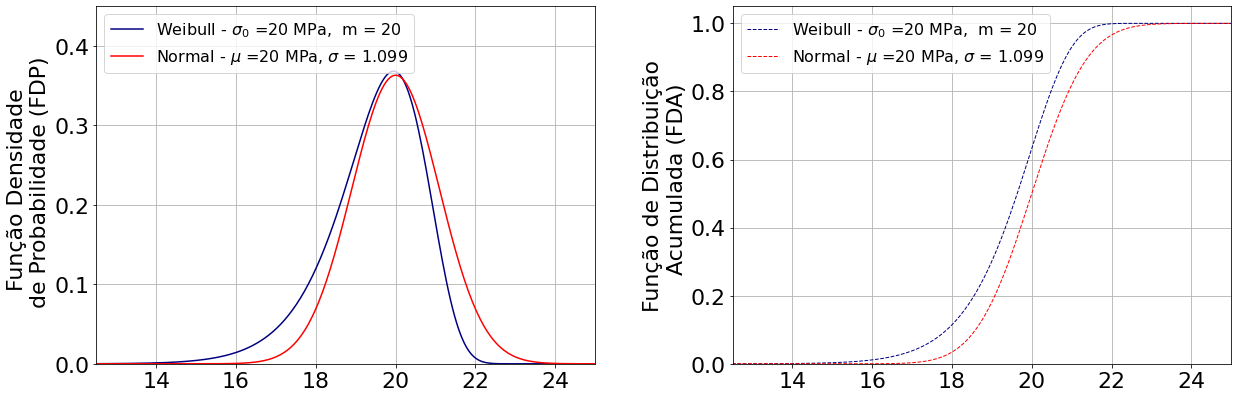

In [220]:
#@title 
# HIDDEN

sigma = np.linspace(0,50, 1000)
m = 15
sigma_0 = 20
weibull_pdf = lambda sigma, m, sigma_0: (m/sigma_0)*(sigma/sigma_0)**(m-1)*np.exp(-(sigma/sigma_0)**m)
weibull_cdf = lambda sigma, m, sigma_0: 1-np.exp(-(sigma/sigma_0)**m)
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
ax1, ax2 = axs
ax1.plot(sigma, stats.weibull_min.pdf(sigma, 20, 0, 20), c='Navy', label='Weibull - $\sigma_0$ =20 MPa,  m = 20')
ax2.plot(sigma, stats.weibull_min.cdf(sigma, 20, 0, 20), c='Navy', label='Weibull - $\sigma_0$ =20 MPa,  m = 20', lw=1, ls='--')
ax1.plot(sigma, stats.norm.pdf(sigma, 20, 1.206**0.5), c='red', label='Normal - $\mu$ =20 MPa, $\sigma$ = 1.099')
ax2.plot(sigma, stats.norm.cdf(sigma, 20, 1.206**0.5), c='red', label='Normal - $\mu$ =20 MPa, $\sigma$ = 1.099', lw=1, ls='--')


# ax1.set_ylabel('Probability Density Function')
# ax2.set_ylabel('Cumulative Distribution Function')
ax2.set_ylabel('Função de Distribuição\n  Acumulada (FDA)')
ax1.set_ylabel('Função Densidade \n de Probabilidade (FDP)')
for ax in [ax1, ax2]:
    ax.set_xlim(12.5, 25)
    ax.set_ylim(0,1.05)
    ax.legend(loc='upper left', fontsize=16)
    ax.grid()
ax1.set_ylim(0,0.450)
plt.tight_layout()
plt.show()
#

<div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Figura 8:</b> Comparação de uma distribuição Normal e uma distribuição de Weibull.</div> </span>

## Então, por que usar a distribuição de Weibull?

# Por que usar a distribuição de Weibull?

- Em primeiro lugar, a distribuição normal é consideravelmente mais complexa:

<center>
    
|Distribuição|FDP|FDA|
|------------|---|---|
|   Weibull  |\begin{equation}
p(\sigma)=\left\{\begin{array}{ll}
- \frac{m}{\sigma_{0}} \left(\frac{\sigma-\sigma_{u}}{\sigma_{0}}\right)^{m-1} e ^{-\left(\frac{\sigma-\sigma_{u}}{\sigma_{0}}\right)^{m}} & \sigma>\sigma_{u} \\
0 & \sigma \leq \sigma_{u}
\end{array}\right.\notag
\end{equation}|\begin{equation}
P(\sigma)=\left\{\begin{array}{ll}
1-e ^{-\left(\frac{\sigma-\sigma_{u}}{\sigma_{0}}\right)^{m}} & \sigma>\sigma_{u} \\
0 & \sigma \leq \sigma_{u} \notag
\end{array}\right.
\end{equation}|
|   Normal   |\begin{equation}
p(x) = \frac{1}{2}\left[1+\operatorname{erf}\left(\frac{x-\mu}{\varsigma \sqrt{2}}\right)\right] \notag
\end{equation}|\begin{equation}
P(x) = \frac{1}{\varsigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\varsigma}\right)^{2}}\notag
\end{equation}|
    


Isto seria **problemático** para as etapas posteriores da **Análise de Weibull**!

- Em segundo lugar, observe que a distribuição normal admite **valores negativos** para a **resistência mecânica**!

## Efeito dos Parâmetros na Distribuição de Weibull

In [766]:
#@title 
# HIDDEN


m = 15
sigma_0 = 20
weibull_pdf = lambda sigma, m, sigma_0: (m/sigma_0)*(sigma/sigma_0)**(m-1)*np.exp(-(sigma/sigma_0)**m)
weibull_cdf = lambda sigma, m, sigma_0: 1-np.exp(-(sigma/sigma_0)**m)

def weibull_view_1(m, sigma_0):
    sigmas = np.linspace(0, 150, 1000)
    fig, axs = plt.subplots(1, 2, figsize=(18, 8))
    axs[0].plot(sigmas, weibull_pdf(sigmas, m, sigma_0), c='Navy', label=f'$\sigma_0$ = {sigma_0},  m = {m}')
    axs[0].set_xlim(0, 50)
#     axs[0].set_ylim(0, 5)
    axs[0].set_xlabel('Tensão, $\sigma$ [MPa]')
    axs[0].set_ylabel('Função Densidade  \n de Probabilidade (FDP)')
    axs[1].plot(sigmas, weibull_cdf(sigmas, m, sigma_0), c='Navy', label=f'$\sigma_0$ = {sigma_0},  m = {m}')
    axs[1].set_xlim(0, 50)
#     axs[1].set_ylim(0, 1.25)
    axs[1].set_xlabel('Tensão, $\sigma$ [MPa]')
    axs[1].set_ylabel('Função de Distribuição \n Acumulada (FDA)')
    plt.tight_layout()
    
    for ax in axs:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.grid()
        ax.legend()
    plt.show()

int_plot = interactive(weibull_view_1,
                       sigma_0=widgets.FloatSlider(value=5,
                                                       min=5,
                                                       max=45,
                                                       step=1,
                                                       description='$\sigma_0$',
                                                       readout_format='.2f'),
                       m=widgets.FloatSlider(value=2,
                                                       min=2,
                                                       max=200,
                                                       step=5,
                                                       description='$m$',
                                                       readout_format='.2f')
                      )
output = int_plot.children[-1]
output.layout.height = '580px'
int_plot.layout = widgets.Layout(display='flex',
                               flex_flow='column-reverse',
                               align_items='center',
                               align_content='center',
                               justify_content='center',
                               width='100%')
int_plot

interactive(children=(FloatSlider(value=2.0, description='$m$', max=200.0, min=2.0, step=5.0), FloatSlider(val…

<div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Widget 4:</b> Efeitos dos parâmetros de uma distribuição de Weibull na sua FDP e FDA.</div> </span>

Qual o sentido físico dos parâmetros de Weibull?

# Análise de Weibull Aplicada na Resistência Mecânica do Material

<span class="img_container center" style="display: inline_block; vertical-align: top; text-align: center;" > <img alt="test" src="./resources/da_vinci.png" style="display:block; margin-left: auto; margin-right: auto; text-align: left;" title="caption" align="center" /> <div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Figura 9:</b> Da Vinci e representação de sua teoria.</div> </span>

A análise de Weibull é inspirada na Teoria do Elo Mais Fraco (proposta por Aristóteles e revisitada por Leonardo Da Vinci):

> "*Uma corrente é tão forte quanto o for o seu elo mais fraco.*"

> "*Quanto maior a corrente, maior a é a propabilidade de que ela falhe quando uma carga é aplicada.*"


Esta teoria considera fraturas frágfeis em uma escala marcoscópica.

# Análise de Weibull Aplicada na Resistência Mecânica do Material

Todo material solicitado por uma carga está sujeito a uma probabilidade de falha, $P_f$

Esta, pode ser representada matematicamente como:

\begin{equation}
P_f = 1 - P_S
\end{equation}

Onde $P_S$ é a probabilidade de sobrevivência do material.


Nós podemos assumir estas quantias como funções da tensão ao qual o material está sujeito, $\sigma$ e devido a teoria do elo mais fraco, do volume $V$:

\begin{equation}
P_f(\sigma, V) = 1 - P_S(\sigma, V)
\end{equation}

# Análise de Weibull Aplicada na Resistência Mecânica do Material

Para conduzir a análise, consideremos o que ocorre em um determinado corpo de volume $V + \delta V$. Este corpo apenas sobreviverá se ambas as partes sobreviverem, isto a probabilidade combinada de ambos os cenários devem ser considerados. Matematicamente:


\begin{equation}
P_S(V + \delta V) = P_S(V) \ P_S(\delta V)
\end{equation}


Se considerarmos que a distribuição de probabilidades de falha é descrita por uma densidade de porbabilidade $\varphi(\sigma)$ (isto é, uma função que retorna o valor de probabilidade de um volume infinitesimal falhar para uma dada aplicação de uma tensão local $\sigma$), temos:

\begin{equation}
P_s(\sigma, \delta V) = 1 - P_f(\sigma, \delta V) = 1 - \varphi(\sigma) \ \delta V
\end{equation}

Substituindo na Equação 5, e rearranjando temos:
\begin{equation}
\frac{P_{s}(\sigma, V+\delta V)-P_{s}(\sigma, V)}{\delta V}=-\varphi(\sigma) \ P_{s}(\sigma, V)
\end{equation}


# Análise de Weibull Aplicada na Resistência Mecânica do Material

Se reduzirmos o valor de $\delta V$ podemos aproximar a derivada da probabilidade de sobrevivência em função do volume:

\begin{equation}
\frac{\partial P_s(\sigma, V)}{\partial V} = - \phi(\sigma) \ P_s(\sigma, V)
\end{equation}

Lembrando que a tensão depende da posição e integrando é possível obter $P_s$:

\begin{equation}
P_{s}(\sigma, V) = \exp \left\{-\int_{V} \varphi[\sigma(\mathbf{r})] d V\right\}
\end{equation}

Usando a Equação 3, podemos achar a probabilidade de falha como sendo:
\begin{equation}
P_{f}(\sigma, V)=1-P_{s}(\sigma, V)= 1 -\exp \left\{-\int_{V} \varphi[\sigma(\mathbf{r})] d V\right\}
\end{equation}

# Análise de Weibull Aplicada na Resistência Mecânica do Material

Para um caso mais simples no qual a tensão independe da posição (por exemplo na caso de uma amostra em tração uniaxial), a Equação 10 se torna:
\begin{equation}
P_{f}(\sigma, V)=1-P_{s}(\sigma, V) =1-\exp \left\{- V \ \varphi(\sigma) \right\}
\end{equation}

Weibull assumiu que $\varphi(\sigma)$ tinha a seguinte forma:

\begin{equation}
\varphi(\sigma)=\left(\frac{\sigma}{\Sigma_{0}}\right)^{m}
\end{equation}

Finalmente chegando que $P_f$ é dado por:

\begin{equation}
P_f = 1 - \exp\left[-V \left(\frac{\sigma}{\Sigma_0}\right)^m\right]
\end{equation}

Que é a função de distribuição acumulada de Weibull com parâmetro de escala $\sigma_0$ dado por:

\begin{equation}
\sigma_0 = \Sigma_0 \ V^{- \frac{1}{m}}
\end{equation}

# Efeito do Volume

Nós iremos avaliar o efeito do volume de uma amostra, usando a probabilidade de falha. Da Equação 13, para um material $a$ com volume $V_a$ e tensão de ruptura $\sigma_a$, temos:

\begin{equation}
P_{f,a} = 1 - \exp\left[-V_a \left(\frac{\sigma_a}{\Sigma_0}\right)^m\right]
\end{equation}

De maneira análoga para um material $b$ temos:
\begin{equation}
P_{f,b} = 1 - \exp\left[-V_b \left(\frac{\sigma_b}{\Sigma_0}\right)^m\right]
\end{equation}

Podemos considerar um mesmo valor de probabilidade de falha igualando as Equações 15 e 16:

\begin{equation}
\exp\left[-V_a \left(\frac{\sigma_a}{\Sigma_0}\right)^m\right] = \exp\left[-V_b \left(\frac{\sigma_b}{\Sigma_0}\right)^m\right]
\end{equation}

Se aplicarmos log em ambos os lados temos:

\begin{equation}
V_a \left(\frac{\sigma_a}{\Sigma_0}\right)^m = V_b \left(\frac{\sigma_b}{\Sigma_0}\right)^m
\end{equation}

Como $\Sigma_0$ independe do volume, podemos cortar o $\left(\frac{1}{\Sigma_0}\right)^m$ de ambos os lados, chegando assim em:

\begin{equation}
V_a \sigma_a^m = V_b \sigma_b^m
\end{equation}

E rearranjando temos:
\begin{equation}
\frac{\sigma_a}{\sigma_b} = \left(\frac{V_b}{V_a}\right)^\frac{1}{m}
\end{equation}

# Efeito do Volume

É possível comparar tais quantias em um gráfico, podemos ver o efeito de reduzir o tamanho da amostra:

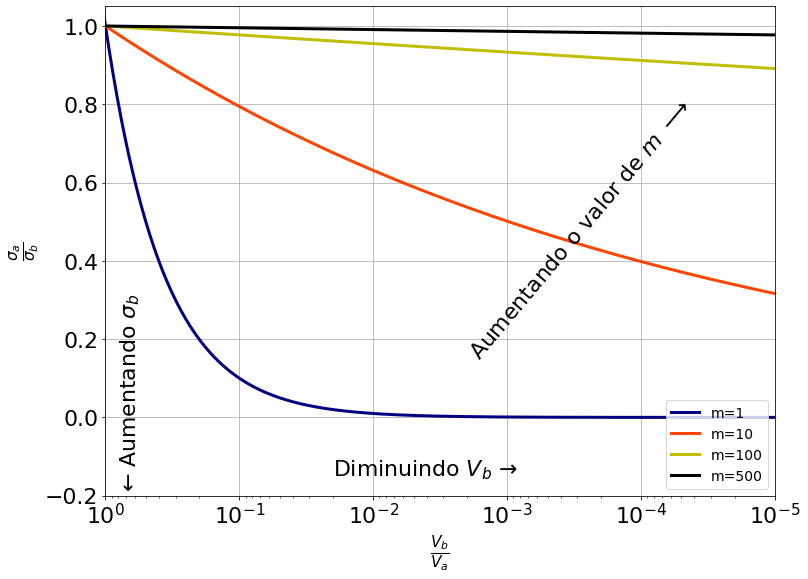

In [869]:
# HIDDEN

VbVa = np.logspace(1, -5, 1000)
m_1 = 1
m_2 = 10
m_3 = 100
m_4 = 500
fig = plt.figure(figsize=(12, 9))
plt.plot(VbVa, VbVa**(1/m_1), c='navy', label=f'm={m_1}', lw=3)
plt.plot(VbVa, VbVa**(1/m_2), c='orangered', label=f'm={m_2}', lw=3)
plt.plot(VbVa, VbVa**(1/m_3), c='y', label=f'm={m_3}', lw=3)
plt.plot(VbVa, VbVa**(1/m_4), c='k', label=f'm={m_4}', lw=3)
plt.ylim(-0.2, 1.05)
plt.xlim(1, 1e-5)
plt.gca().set_xscale('log')
plt.text(0.002, 0.15, 'Aumentando o valor de $m$ $\longrightarrow$', rotation=50)

plt.ylabel(r'$\frac{\sigma_a}{\sigma_b}$')
plt.xlabel(r'$\frac{V_b}{V_a}$')
plt.text(0.02, -0.15, 'Diminuindo $V_b$ →')
plt.text(0.8, -0.175, '← Aumentando $\sigma_b$', rotation=90)

plt.legend(loc='lower right', fontsize=14)
plt.grid()
plt.show()

<div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Figura 10:</b> Efeito do módulo de Weibull na relação volume da amostra e tensão de ruptura medida.</div> </span>

# Efeito do Ensaio

Nós podemos considerar o efeito do Ensaio na resistência mecânica considerando a forma mais geral da Probabilidade de falha, dada na Equação 10, e considerando a que a tensão pode ser descrita como:

\begin{equation}
\sigma(\mathbf{r})=\sigma_{\max } g(\mathbf{r})
\end{equation}

Substituindo na Equação 10, temos:
\begin{equation}
P_{f}=1-\exp \left[-\left(\frac{\sigma_{\max }}{\Sigma_{0}}\right)^{m} \int_{V} g^{m}(\mathbf{r}) d V\right]
\end{equation}

E assim podemos definir o fator do ensaio $k\le1$:

\begin{equation}
k=\frac{1}{V} \int_{V} g^{m}(\mathbf{r}) d V \quad \quad \quad \text { ou } \quad \quad \quad k=\frac{1}{V} \int_{V}\left(\frac{\sigma(\mathbf{r})}{\sigma_{\max }}\right)^{m} d V
\end{equation}

Dessa maneira temos que a Equação 22 pode ser reescrita como:
\begin{equation}
P_{f}=1-\exp \left[-k V\left(\frac{\sigma_{\max }}{\Sigma_{0}}\right)^{m}\right]
\end{equation}

Calculando o fator do ensaio de fração, temos que $\sigma(\mathbf{r})=\sigma_{max}$ e portanto $k_t$ é dado por:

\begin{equation}
k_t = \frac{1}{V} \int_V 1 dV = \frac{1}{V} \iiint dx dy dv = \frac{a \ b \ c}{V} = 1
\end{equation}


Para uma amostra em Flexão em três pontos, um resultado da Mecânica Aplicada indica que:
\begin{equation}
\frac{\sigma(y)}{\sigma_{max}} = \frac{4 \ x \ y}{L \ h}
\end{equation}




<span class="img_container center" style="display: inline_block; vertical-align: top; text-align: center;" > <img alt="test" src="https://static.xyztec.com/images/xyztec/3-Point-bend-test-web.jpg?url=https://static.xyztec.com/images/xyztec/3-Point-bend-test-big.jpg
" style="display:block; margin-left: auto; margin-right: auto; text-align: left;" title="caption" align="center" /> <div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Figura 10:</b> Geometria do Ensaio de Flexão 3 Pontos.</div> </span>

Assim, considerando que o volume solicitado é $V= b \ L \ h$:
    

\begin{equation}
k_{3pt} = \frac{1}{V} \int_{0}^{L}\left(\frac{2 x}{L}\right)^{m} d x \int_{0}^{h / 2}\left(\frac{2 y}{h}\right)^{m} d y \int_{0}^{b} d z= \frac{L \ h  \ b}{V \ 2 \ (m+1)^{2}} = \frac{1}{2(m+1)^{2}}
\end{equation}


# Efeito do Ensaio

Adotando uma estratégia similar àquela utilizada para a análise do efeito do volume, igualando as probabilidade de falha para um ensaio em tração uniaxial e em flexão três pontos chegamos em:

\begin{equation}
\frac{\bar{\sigma}_{3 pt, \max }}{\bar{\sigma}_{t}}=\left(\frac{k_{t}}{k_{3 pt}}\right)^{1 / m}=\left[2(m+1)^{2}\right]^{1 / m}
\end{equation}

Usando esta metodologia analítica para o ensaio de quatro pontos resulta em:
\begin{equation}
\frac{\bar{\sigma}_{4 pt, \max }}{\bar{\sigma}_{t}}=\left(\frac{k_{t}}{k_{4 pt}}\right)^{1 / m}=\left[\frac{4(m+1)^{2}}{m+2}\right]^{1 / m}
\end{equation}

Esses comportamentos podem ser visualizados a seguir:


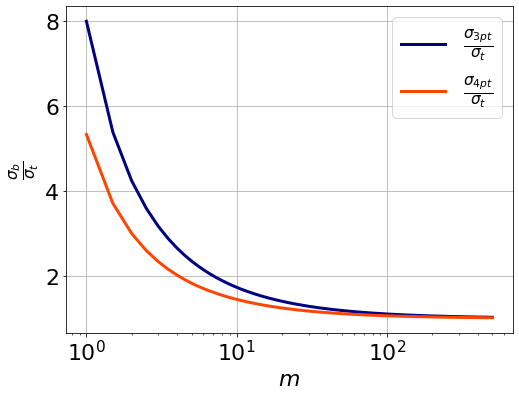

In [878]:
# HIDDEN

ms = np.linspace(1, 500, 1000)
fig = plt.figure(figsize=(8, 6))
three_t =  lambda m: (2*(m+1)**2)**(1/m)
four_t = lambda m: (4*(m+1)**2/(m+2))**(1/m)
plt.plot(ms, three_t(ms), lw=3, label=r'$\frac{\sigma_{3pt}}{\sigma_t}$', c='navy')
plt.plot(ms, four_t(ms), lw=3, label=r'$\frac{\sigma_{4pt}}{\sigma_t}$', c='orangered')
plt.ylabel(r'$\frac{\sigma_b}{\sigma_t}$')
plt.xlabel(r'$m$')

plt.gca().set_xscale('log')
plt.grid()
plt.legend()
plt.show()

# Como Obter os Parâmetros de Weibull?

Uma forma é através do Gráfico de Weibull. Ele é uma linearização da probabilidade de falha (como a teoria de cristalização de Avrami ou a lei de potências de um fluído não newtoniano)

 

Para tanto, utiliza-se a aplicação da função log duplamente (uma vez para reduzir a exponenciação e uma segunda para a potência $m$)

\begin{equation}
\ln \ln \left(\frac{1}{1-P_{f}}\right) = m \ln\left( \frac{\sigma}{\sigma_{0}}\right)
\end{equation}

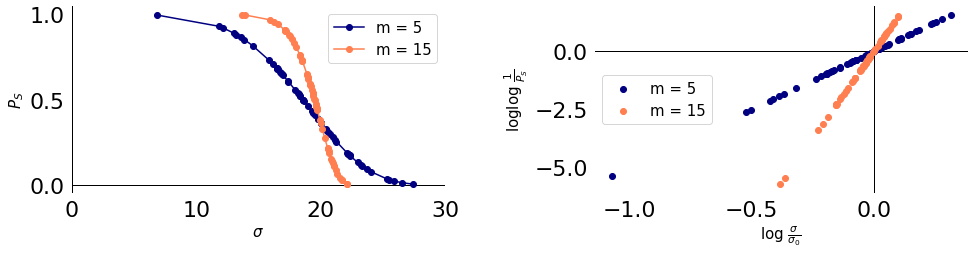

In [565]:
#@title
# HIDDEN

weibull_pdf = lambda sigma, m, sigma_0: np.exp(-(sigma/sigma_0)**m)
sigma_0 = 20e6
sigmas_f_m5 = np.sort(np.random.weibull(5, 60)*sigma_0)
sigmas_f_m15 = np.sort(np.random.weibull(15, 60)*sigma_0)

S_m5 = weibull_pdf(sigmas_f_m5, 5, sigma_0)
S_m15 = weibull_pdf(sigmas_f_m15, 15, sigma_0)

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

axs[0].plot(sigmas_f_m5*1e-6, S_m5, '-o', c='navy', label='m = 5')
axs[0].plot(sigmas_f_m15*1e-6, S_m15, '-o', c='coral', label='m = 15')

axs[0].axhline(0, c='k', zorder=0, lw=1)
axs[0].axvline(0, c='k', zorder=0, lw=1)
axs[0].set_ylabel(r'$P_S$', fontsize=15)
axs[0].set_xlabel(r'$\sigma}{\sigma_0}}$', fontsize=15)



axs[1].scatter(np.log(sigmas_f_m5 / sigma_0), np.log(np.log(1 / S_m5)), c='navy', label='m = 5')
axs[1].scatter(np.log(sigmas_f_m15 / sigma_0), np.log(np.log(1 / S_m15)), c='coral', label='m = 15')

axs[1].axhline(0, c='k', zorder=0, lw=1)
axs[1].axvline(0, c='k', zorder=0, lw=1)
axs[1].set_ylabel(r'$\log{\log{\ \frac{1}{P_S}}}$', fontsize=15)
axs[1].set_xlabel(r'$\log{\ \frac{\sigma}{\sigma_0}}$', fontsize=15)

for ax in axs:
    for side in ['top','right','bottom','left']:
        ax.spines[side].set_visible(False)
    ax.tick_params(axis='both',which='both',labelbottom=True,bottom=False,left=False)
    ax.legend(fontsize=15)

axs[0].set_xlim(0, 30)
plt.tight_layout(w_pad=2)
plt.show()

<div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Figura 11:</b> Gráfico de Weibull para obtenção dos parâmetros.</div> </span>

In [767]:
#@title 
# HIDDEN

def weibull_view_2(m_1, sigma_1):
    weibull_pdf = lambda sigma, m, sigma_0: np.exp(-(sigma/sigma_0)**m)
    sigma_0 = 20e6
    sigmas_f_m5 = np.sort(np.random.weibull(5, 60)*sigma_0)
    sigmas_f_m15 = np.sort(np.random.weibull(m_1, 60)*sigma_1)

    S_m5 = weibull_pdf(sigmas_f_m5, 5, sigma_0)
    S_m15 = weibull_pdf(sigmas_f_m15, m_1, sigma_1)

    fig, axs = plt.subplots(1, 2, figsize=(14, 8))

    axs[0].plot(sigmas_f_m5*1e-6, S_m5, '-o', c='navy', label='$\sigma_0$ = 20MPa, m = 5')
    axs[0].plot(sigmas_f_m15*1e-6, S_m15, '-o', c='coral', label=f'$\sigma_0$ = {round(sigma_1*1e-6, 2)}MPa, m = {m_1}')

    axs[0].axhline(0, c='k', zorder=0, lw=1)
    axs[0].axvline(0, c='k', zorder=0, lw=1)
    axs[0].set_ylabel(r'$P_S$', fontsize=15)
    axs[0].set_xlabel(r'$\sigma}{\sigma_0}}$', fontsize=15)



    axs[1].scatter(np.log(sigmas_f_m5 / sigma_0), np.log(np.log(1 / S_m5)), c='navy', label='$\sigma_0$ = 20MPa, m = 5')
    axs[1].scatter(np.log(sigmas_f_m15 / sigma_1), np.log(np.log(1 / S_m15)), c='coral', label=f'$\sigma_0$ = {round(sigma_1*1e-6, 2)}MPa, m = {m_1}')

    axs[1].axhline(0, c='k', zorder=0, lw=1)
    axs[1].axvline(0, c='k', zorder=0, lw=1)
    axs[1].set_ylabel(r'$\log{\log{\ \frac{1}{P_S}}}$', fontsize=15)
    axs[1].set_xlabel(r'$\log{\ \frac{\sigma}{\sigma_0}}$', fontsize=15)

    for ax in axs:
        for side in ['top','right','bottom','left']:
            ax.spines[side].set_visible(False)
        ax.tick_params(axis='both',which='both',labelbottom=True,bottom=False,left=False)
        ax.legend(loc='upper left', fontsize=14)

#     axs[0].set_xlim(0, 30)
    plt.tight_layout(w_pad=2)
    plt.show()

int_plot = interactive(weibull_view_2,
                       sigma_1=widgets.FloatSlider(value=5e6,
                                                       min=5e6,
                                                       max=45e6,
                                                       step=1,
                                                       description='$\sigma_0$',
                                                       readout_format='.2e'),
                       m_1=widgets.FloatSlider(value=2,
                                                       min=2,
                                                       max=80,
                                                       step=5,
                                                       description='$m$',
                                                       readout_format='.2f')
                      )
output = int_plot.children[-1]
output.layout.height = '580px'
int_plot.layout = widgets.Layout(display='flex',
                               flex_flow='column-reverse',
                               align_items='center',
                               align_content='center',
                               justify_content='center',
                               width='100%')
int_plot

interactive(children=(FloatSlider(value=2.0, description='$m$', max=80.0, min=2.0, step=5.0), FloatSlider(valu…

<div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Widget 5:</b> Visualização dos parâmetros no gráfico de Weibull.</div> </span>

In [768]:
#@title
# HIDDEN

def weibull_view_3(m_1, sigma_1):
    weibull_pdf = lambda sigma, m, sigma_0: np.exp(-(sigma/sigma_0)**m)
    sigma_0 = 20e6
    sigmas_f_m5 = np.sort(np.random.weibull(5, 60)*sigma_0)
    sigmas_f_m15 = np.sort(np.random.weibull(m_1, 60)*sigma_1)

    S_m5 = weibull_pdf(sigmas_f_m5, 5, sigma_0)
    S_m15 = weibull_pdf(sigmas_f_m15, m_1, sigma_1)

    fig, axs = plt.subplots(1, 2, figsize=(14, 8))

    axs[0].plot(sigmas_f_m5*1e-6, S_m5, '-o', c='navy', label='$\sigma_0$ = 20MPa, m = 5')
    axs[0].plot(sigmas_f_m15*1e-6, S_m15, '-o', c='coral', label=f'$\sigma_0$ = {round(sigma_1*1e-6, 2)}MPa, m = {m_1}')

    axs[0].axhline(0, c='k', zorder=0, lw=1)
    axs[0].axvline(0, c='k', zorder=0, lw=1)
    axs[0].set_ylabel(r'$P_S$', fontsize=15)
    axs[0].set_xlabel(r'$\sigma}{\sigma_0}}$', fontsize=15)



    axs[1].scatter(np.log(sigmas_f_m5), np.log(np.log(1 / S_m5)), c='navy', label='$\sigma_0$ = 20MPa, m = 5')
    axs[1].scatter(np.log(sigmas_f_m15), np.log(np.log(1 / S_m15)), c='coral', label=f'$\sigma_0$ = {round(sigma_1*1e-6, 2)}MPa, m = {m_1}')

    axs[1].axhline(0, c='k', zorder=0, lw=1)
    axs[1].axvline(0, c='k', zorder=0, lw=1)
    axs[1].set_ylabel(r'$\log{\log{\ \frac{1}{P_S}}}$', fontsize=15)
    axs[1].set_xlabel(r'$\log{\sigma}$', fontsize=15)

    for ax in axs:
        for side in ['top','right','bottom','left']:
            ax.spines[side].set_visible(False)
        ax.tick_params(axis='both',which='both',labelbottom=True,bottom=False,left=False)
        ax.legend(loc='upper left', fontsize=14)

    axs[1].set_xlim(10, 20)
    plt.tight_layout(w_pad=2)
    plt.show()

int_plot = interactive(weibull_view_3,
                       sigma_1=widgets.FloatSlider(value=5e6,
                                                       min=5e6,
                                                       max=45e6,
                                                       step=1,
                                                       description='$\sigma_0$',
                                                       readout_format='.2e'),
                       m_1=widgets.FloatSlider(value=2,
                                                       min=2,
                                                       max=80,
                                                       step=5,
                                                       description='$m$',
                                                       readout_format='.2f')
                      )
output = int_plot.children[-1]
output.layout.height = '580px'
int_plot.layout = widgets.Layout(display='flex',
                               flex_flow='column-reverse',
                               align_items='center',
                               align_content='center',
                               justify_content='center',
                               width='100%')
int_plot

interactive(children=(FloatSlider(value=2.0, description='$m$', max=80.0, min=2.0, step=5.0), FloatSlider(valu…

<div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Widget 6:</b> Visualização dos parâmetros no gráfico de Weibull adaptado.</div> </span>

# Como Obter os Parâmetros de Weibull?

Entretanto, para este *plot* é necessário a probabilidade de sobrevivência cada corpo. O ensaio em um número n de amostras que compõe a amostra a partir do qual estimamos o módulo de Weibull resulta em:

In [506]:
# HIDDEN
# nbi:left
sigma_0 = 20e6
weibull_m5 = stats.weibull_min(5, 0, sigma_0)
N=60
sigmas_f_m5 = weibull_m5.rvs(size=N)
# sigmas_f_m5 = pd.read_clipboard(header=None).values.flatten()
df_1 = pd.DataFrame([sigmas_f_m5*1e-6]).T
df_1.columns = ['$\sigma_f$ [MPa]']
df_1.index.name = 'Amostra'
print('Dados Brutos')
df_1

Dados Brutos


,$\sigma_f$ [MPa]
Amostra,
0,13.906065
1,21.118875
2,19.755397
...,...
57,26.676978
58,28.887704
59,12.637076


In [507]:
# HIDDEN
# nbi:right
print('Dados Ordenados')
df_1 = df_1.sort_values('$\sigma_f$ [MPa]')
df_1['Rank, i'] = np.arange(1, N+1)
df_1


Dados Ordenados


,$\sigma_f$ [MPa],"Rank, i"
Amostra,,
7,10.467905,1
14,11.845441,2
29,12.057470,3
...,...,...
52,26.922920,58
58,28.887704,59
28,29.707851,60


É possível estimar $P_f$ a partir do rank $i$ seguindo a Equação abaixo:

\begin{equation}
P_f(i) = \frac{i-0.3}{n+0.4}
\end{equation}


# Como Obter os Parâmetros de Weibull?

In [736]:
# HIDDEN

df_1['P_s'] = 1 - (df_1['Rank, i']-0.3)/(N+0.4)
df_1[r'lnln($\frac{1}{P_s}$)'] = np.log(np.log(1/df_1['P_s']))
df_1[r'ln($\sigma_f$)'] = np.log(df_1['$\sigma_f$ [MPa]'])
df_1

,$\sigma_f$ [MPa],"Rank, i",P_s,lnln($\frac{1}{P_s}$),ln($\sigma_f$)
Amostra,,,,,
7,10.467905,1,0.988411,-4.451841,2.348314
14,11.845441,2,0.971854,-3.556120,2.471943
29,12.057470,3,0.955298,-3.084959,2.489684
...,...,...,...,...,...
52,26.922920,58,0.044702,1.133895,3.292978
58,28.887704,59,0.028146,1.272667,3.363416
28,29.707851,60,0.011589,1.494625,3.391411


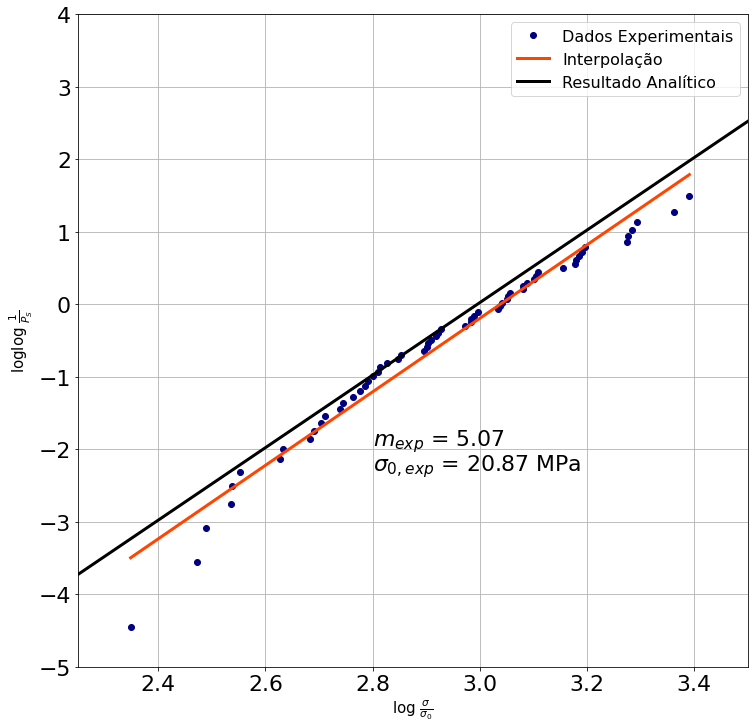

In [737]:
# HIDDEN

plt.figure(figsize=(12, 12))
plt.plot(df_1[r'ln($\sigma_f$)'], df_1[r'lnln($\frac{1}{P_s}$)'], 'o', label='Dados Experimentais', c='navy', lw=3)
m_interp, sig_0_interp = np.polyfit(df_1[r'ln($\sigma_f$)'], df_1[r'lnln($\frac{1}{P_s}$)'], 1)
plt.plot(df_1[r'ln($\sigma_f$)'], df_1[r'ln($\sigma_f$)']*m_interp+sig_0_interp, '-', label='Interpolação', c='orangered', lw=3)
sigs = np.linspace(1e6, 40e6, 1000)
plt.plot(np.log(sigs*1e-6), np.log(np.log(1/(1-weibull_m5.cdf(sigs)))), '-k', label='Resultado Analítico', lw=3)
plt.text(2.8, -1.95, '$m_{exp}$ = ' + str(round(m_interp, 2)))
plt.text(2.8, -2.3, '$\sigma_{0, exp}$ = ' + str(round(np.exp(-sig_0_interp/m_interp), 2)) + ' MPa')

plt.ylabel(r'$\log{\log{\ \frac{1}{P_S}}}$', fontsize=15)
plt.xlabel(r'$\log{\ \frac{\sigma}{\sigma_0}}$', fontsize=15)

plt.xlim(2.25, 3.5)
plt.ylim(-5, 4)
plt.legend(fontsize=16)
plt.grid()
plt.show()

# Alguns Comentários Sobre o Módulo de Weibull:


- Qual o número de corpos de prova que compõe uma amostra para se estimar o módulo?

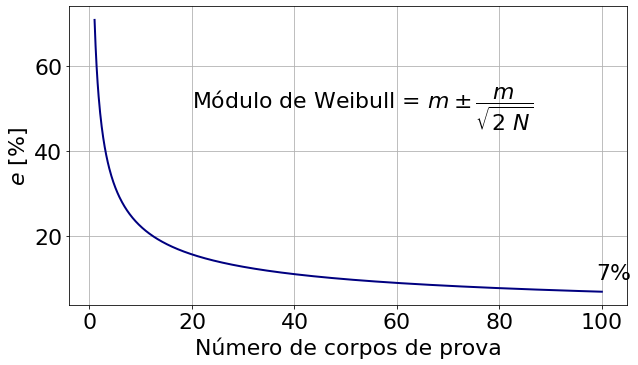

In [589]:
# HIDDEN

plt.figure(figsize=(10, 5.5))
Ns = np.linspace(1, 100, 1000)
m_1 = 1
m_5 = 5

plt.plot(Ns, 1 / (2*Ns)**0.5*100, c='navy', lw=2)
plt.text(20, 50, r'Módulo de Weibull = $m \pm \dfrac{m}{\sqrt{2 \ N}}$')
plt.text(99, 10, str(int((1 / (2*Ns)**0.5*100)[-1]))+'%')
plt.grid()
plt.ylabel('$e$ [%]')
plt.xlabel('Número de corpos de prova')
plt.show()


- O módulo de Weibull não está relacionado apenas ao material, mas é influenciado também pela repetibilidade dos CPs

- É necessário se atentar que o comportamento da amostra (de seguir uma distribuição de probabilidade de falha igual ao de Weibull) foi **ASSUMIDO** como sendo o comportamento real. Este caráter *fenomenológico* é uma das principais críticas à analise de Weibull

# Qual Material Possui Maior $m$?

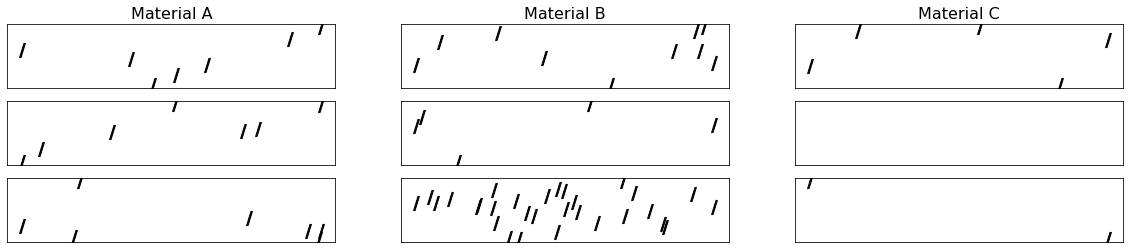

In [773]:
# HIDDEN

fig, axs = plt.subplots(3, 3, figsize=(20, 4))
for ax in axs.flatten():
    ax.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
axs[0, 0].set_title('Material A', fontsize=16)
axs[0, 1].set_title('Material B', fontsize=16)
axs[0, 2].set_title('Material C', fontsize=16)

for i in range(7):
    axs[0,0].scatter(np.random.normal(), np.random.normal(), marker='$/$', s=200, c='k')
    axs[1,0].scatter(np.random.normal(), np.random.normal(), marker='$/$', s=200, c='k')
    axs[2,0].scatter(np.random.normal(), np.random.normal(), marker='$/$', s=200, c='k')

for i in range(10):
    axs[0,1].scatter(np.random.normal(), np.random.normal(), marker='$/$', s=200, c='k')
for i in range(5):
    axs[1,1].scatter(np.random.normal(), np.random.normal(), marker='$/$', s=200, c='k')
for i in range(30):
    axs[2,1].scatter(np.random.normal(), np.random.normal(), marker='$/$', s=200, c='k')
    
    
for i in range(5):
    axs[0,2].scatter(np.random.normal(), np.random.normal(), marker='$/$', s=200, c='k')
for i in range(2):
    axs[2,2].scatter(np.random.normal(), np.random.normal(), marker='$/$', s=200, c='k')
    
plt.show()

In [730]:
# HIDDEN

#@title
global n_A, n_B, n_C
n_A = 0 
n_B = 0
n_C = 0
n_s = [n_A, n_B, n_C]

out = widgets.Output()
def A_on_button_clicked(_):
    global n_A, n_B, n_C
    with out:
        clear_output(True)
        n_A += 1
        n_s = [n_A, n_B, n_C]
        plt.bar(['A', 'B', 'C'], n_s, zorder=5)
        plt.ylim(0, 15)
        plt.ylabel('# Respostas')
        plt.grid()
        plt.show()
A=widgets.Button(description='A')
A.on_click(A_on_button_clicked)
def B_on_button_clicked(_):
    global n_A, n_B, n_C
    with out:
        clear_output(True)
        n_B += 1
        n_s = [n_A, n_B, n_C]
        plt.bar(['A', 'B', 'C'], n_s, zorder=5)
        plt.ylim(0, 15)
        plt.ylabel('# Respostas')
        plt.grid()
        plt.show()
B=widgets.Button(description='B')
B.on_click(B_on_button_clicked)
def C_on_button_clicked(_):
    global n_A, n_B, n_C
    with out:
        clear_output(True)
        n_C += 1
        n_s = [n_A, n_B, n_C]
        plt.bar(['A', 'B', 'C'], n_s, zorder=5)
        plt.ylim(0, 15)
        plt.ylabel('# Respostas')
        plt.grid()
        plt.show()
C=widgets.Button(description='C')
C.on_click(C_on_button_clicked)

def R_on_button_clicked(_):
    global n_A, n_B, n_C
    with out:
        clear_output(True)
        n_A = 0 
        n_B = 0
        n_C = 0
        n_s = [n_A, n_B, n_C]
        plt.bar(['A', 'B', 'C'], n_s, zorder=5)
        plt.ylim(0, 15)
        plt.ylabel('# Respostas')
        plt.grid()
        plt.show()
Resetar=widgets.Button(description='Resetar')
Resetar.on_click(R_on_button_clicked)
    
display(widgets.HBox([A, B, C]))
with out:
    plt.bar(['A', 'B', 'C'], n_s)
    plt.ylim(0, 15)
    plt.ylabel('# Respostas')
    plt.grid()
    plt.show()
display(out)
display(Resetar)

Output()

Button(description='Resetar', style=ButtonStyle())

# Observações Experimentais

## Valores comuns de módulo de Weibull

---

<center>

|Materiais Cerâmicos|Materiais Metálicos*|Materiais Poliméricos*|
|------------------:|------------------:|--------------------:|
|       5<m<15      |     100<m<500     |       50<m<150      |

## Exemplo da influência do processamento no módulo de Weibull

---

<center>

|Concreto com Cimento Portland |Concreto com Cimento Portland + Dispersante|
|:----------------------------:|:-----------------------------------------:|
|             m=3,5            |                    m=20                   |

# Observações Experimentais

## O que acontece com o m quando uma amostra a verde é queimada?

<span class="img_container center" style="display: inline_block; vertical-align: top; text-align: center;" > <img alt="test" src="./resources/green.png" style="display:block; margin-left: auto; margin-right: auto; text-align: left;" title="caption" align="center" height="800" width='350' /> <div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left;"><b>Figura 9:</b> Kendall et al, Influence ot Toughness on Weibull modulus of Ceramics. Efeito da queima no módulo de Weibull.</div> </span>

## Materiais de maior tenacidade a fratura possuem a fama de ser mais confiáveis. Por que?

Efeito dos danos ao longo do tempo de vida do material alteram o módulo de Weibull, especialmente para aqueles materiais onde tais danos ocorrem de maneira mais fácil (menor tenacidade).

# Considerações Finais

- O comportamento mecânico dos materiais é sucetível a diversas fontes de variabilidade (até mesmo erros de medida!)

- Representações matemáticas podem descrever este comportamento (médias, desvios, distribuições estatísticas)

- A probabilidade de falha de um material pode ser descrita por tais distribuições

- Em sua derivação, conceitos clássicos como a teoria do elo mais fraco geraram *insights* de grande importância como o efeito do volume e do ensaio

- O módulo de Weibull descreve a variabilidade de um determinado conjunto de amsotras e serve para:
     - Poder comparar materiais distintos 
     - Converter resultados entre corpos de prova de diferentes dimensões e de ensaios distintos